In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing.transactionencoder import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
transactions = [ [ 'milk', 'bread' ],
              [ 'bread', 'nappy', 'beer', 'potato' ],
              [ 'milk', 'nappy', 'beer', 'coke' ],
              [ 'bread', 'milk', 'nappy', 'beer' ],
              [ 'bread', 'milk', 'nappy', 'coke' ] ]
te = TransactionEncoder()
transactions_df = te.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_df, columns=te.columns_)

<AxesSubplot:>

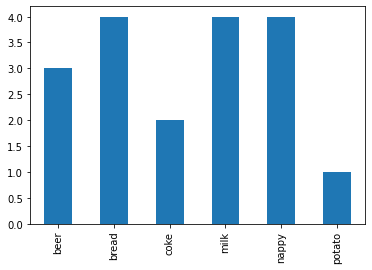

In [3]:
transactions_df.sum().plot.bar()

In [4]:
frequent_itemsets = apriori(transactions_df, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets.head(10)

,support,itemsets
1,0.8,(bread)
3,0.8,(milk)
4,0.8,(nappy)
0,0.6,(beer)
9,0.6,"(beer, nappy)"
13,0.6,"(bread, nappy)"
12,0.6,"(bread, milk)"
17,0.6,"(milk, nappy)"
8,0.4,"(milk, beer)"
24,0.4,"(milk, beer, nappy)"


In [5]:
ar = association_rules(frequent_itemsets,
                       metric='confidence',min_threshold=0.8)
ar.sort_values(by='lift',ascending=False,inplace=True)
ar.head(10)
# antecedents->consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(potato),"(bread, beer)",0.2,0.4,0.2,1.0,2.500000,0.12,inf
17,(potato),"(bread, beer, nappy)",0.2,0.4,0.2,1.0,2.500000,0.12,inf
16,"(potato, nappy)","(bread, beer)",0.2,0.4,0.2,1.0,2.500000,0.12,inf
12,"(bread, potato, nappy)",(beer),0.2,0.6,0.2,1.0,1.666667,0.08,inf
21,(potato),"(bread, nappy)",0.2,0.6,0.2,1.0,1.666667,0.08,inf
25,"(potato, nappy)",(beer),0.2,0.6,0.2,1.0,1.666667,0.08,inf
26,(potato),"(beer, nappy)",0.2,0.6,0.2,1.0,1.666667,0.08,inf
27,"(bread, potato)",(beer),0.2,0.6,0.2,1.0,1.666667,0.08,inf
15,"(potato, beer)","(bread, nappy)",0.2,0.6,0.2,1.0,1.666667,0.08,inf
14,"(bread, potato)","(beer, nappy)",0.2,0.6,0.2,1.0,1.666667,0.08,inf


<AxesSubplot:xlabel='support', ylabel='lift'>

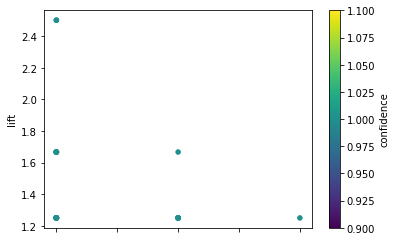

In [6]:
ar[['support', 'confidence', 'lift']].plot.scatter(x='support', y='lift', c='confidence', colormap='viridis')

In [13]:
ar = ar.query("support >= 0.3 and lift >= 1.2").sort_values(by='lift', ascending=False).head(5)
ar[['antecedents', 'consequents']] = ar[['antecedents', 'consequents']].applymap(lambda x: list(x))
round(ar[['antecedents', 'consequents', 'support', 'confidence', 'lift']], 3).to_csv('example1.csv')

In [14]:
def drawGraph(ar, Multiplier=1000):
    G = nx.DiGraph()
    size_dict = {}
    color_dict = {}
    label_dict = {}
    for i in ar.index:
        ser = ar.loc[i]
        G.add_node(i)
        # node_list[i] = i
        size_dict[i] = ser['support'] * Multiplier
        color_dict[i] = ser['lift']
        label_dict[i] = ''
        for ant in list(ser['antecedents']):
            G.add_node(ant)
            G.add_edge(ant, i)
            size_dict[ant] = 0
            color_dict[ant] = 0
            label_dict[ant] = ant

        for j in list(ser['consequents']):
            G.add_node(j)
            size_dict[ j ] = 0
            color_dict[ j ] = 0
            label_dict[ j ] = j
            G.add_edge(i, j)

    node_list, size_list = zip(*size_dict.items())
    node_list, color_list = zip(*color_dict.items())
    plt.figure(figsize=(20, 10), dpi=80)
    pos = nx.spring_layout(G)
    cmap = plt.cm.get_cmap('Reds')
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=node_list,
                           node_size=size_list,
                           node_color=color_list,
                           alpha=0.5, with_labels=True, cmap=cmap)
    nx.draw_networkx_edges(G,pos=pos, edge_color='grey', alpha=0.5, width=2, arrowsize=15)
    nx.draw_networkx_labels(G, pos=pos,labels=label_dict, font_size=20)
    plt.show()


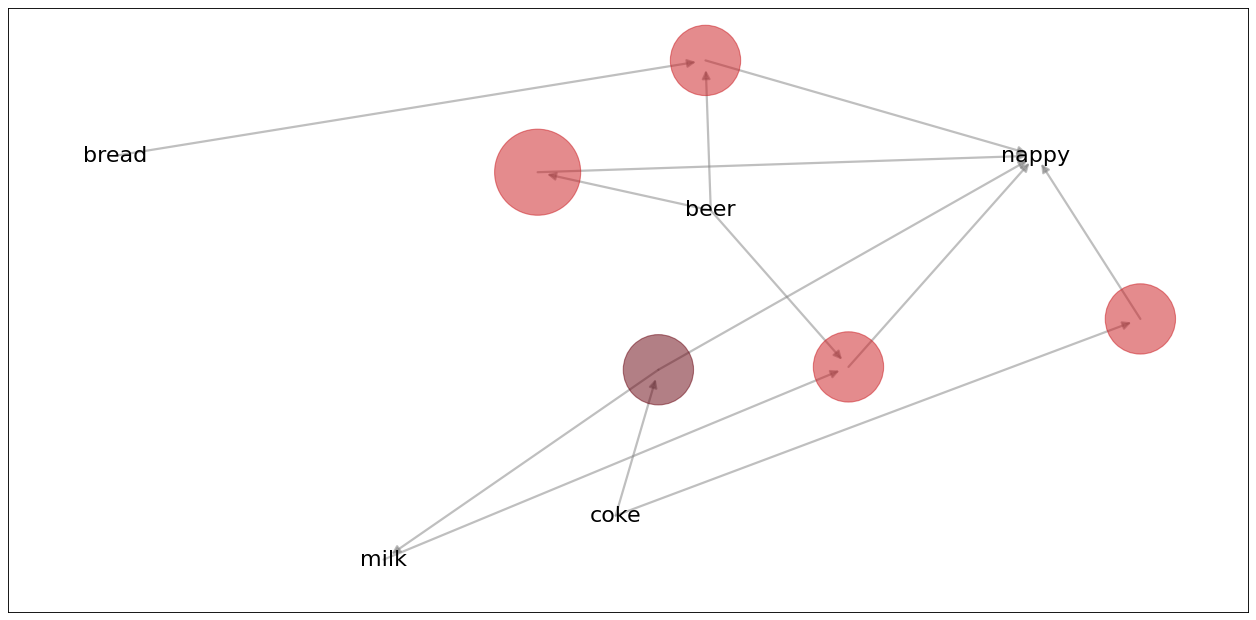

In [28]:
drawGraph(ar, Multiplier=10000)

In [2]:
import os

os.chdir(r'C:\Users\Simmons\PycharmProjects\ARM')
with open(r'./input/Market_Basket.csv', 'r') as f:
    transactions = [l for l in csv.reader(f)]

In [3]:
te = TransactionEncoder()
transactions_df = te.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_df, columns=te.columns_)

<AxesSubplot:>

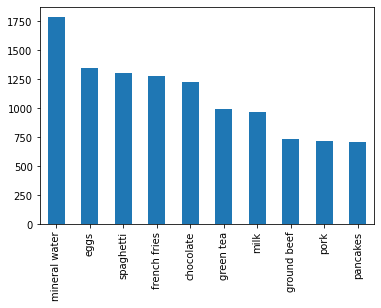

In [17]:
transactions_df.sum().sort_values(ascending=False).head(10).plot.bar()

In [18]:
frequent_itemsets = apriori(transactions_df, min_support=0.002, use_colnames=True)

<AxesSubplot:xlabel='support', ylabel='lift'>

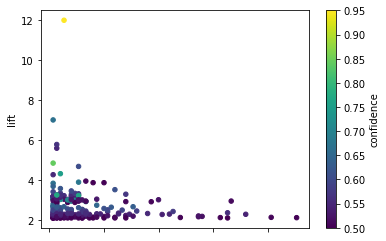

In [19]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
ar[['support', 'confidence', 'lift']].plot.scatter(x='support', y='lift', c='confidence', colormap='viridis')

In [20]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
ar = ar.query("support >= 0.002 and lift >= 2").sort_values(by='lift', ascending=False).head(5)

In [21]:
ar[['antecedents', 'consequents']] = ar[['antecedents', 'consequents']].applymap(lambda x: list(x))
round(ar[['antecedents', 'consequents', 'support', 'confidence', 'lift']], 3).to_csv('example2.csv')

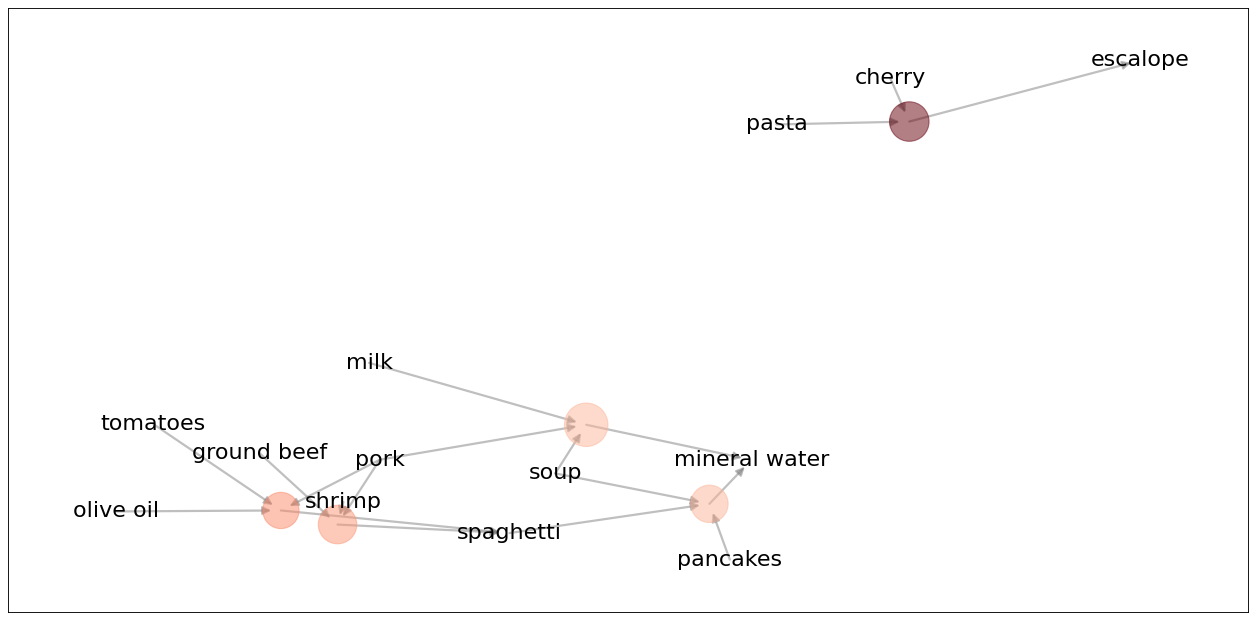

In [19]:

def drawGraph(ar, Multiplier=1000):
    G = nx.DiGraph()
    size_dict = {}
    color_dict = {}
    label_dict = {}
    for i in ar.index:
        ser = ar.loc[i]
        G.add_node(i)
        # node_list[i] = i
        size_dict[i] = ser['support'] * Multiplier
        color_dict[i] = ser['lift']
        label_dict[i] = ''
        for ant in list(ser['antecedents']):
            G.add_node(ant)
            G.add_edge(ant, i)
            size_dict[ant] = 0
            color_dict[ant] = 0
            label_dict[ant] = ant

        for j in list(ser['consequents']):
            G.add_node(j)
            size_dict[ j ] = 0
            color_dict[ j ] = 0
            label_dict[ j ] = j
            G.add_edge(i, j)

    node_list, size_list = zip(*size_dict.items())
    node_list, color_list = zip(*color_dict.items())
    plt.figure(figsize=(20, 10), dpi=80)
    pos = nx.spring_layout(G)
    cmap = plt.cm.get_cmap('Reds')
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=node_list,
                           node_size=size_list,
                           node_color=color_list,
                           alpha=0.5, with_labels=True, cmap=cmap)
    nx.draw_networkx_edges(G,pos=pos, edge_color='grey', alpha=0.5, width=2, arrowsize=15)
    nx.draw_networkx_labels(G, pos=pos,labels=label_dict, font_size=20)
    plt.show()

In [ ]:
drawGraph(ar, Multiplier=500000)

In [4]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(transactions_df, min_support=0.002, use_colnames=True)

<AxesSubplot:xlabel='support', ylabel='lift'>

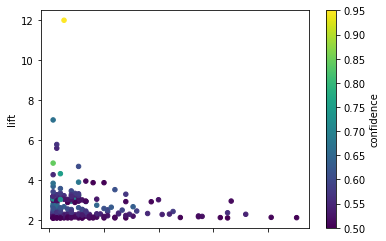

In [5]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
ar[['support', 'confidence', 'lift']].plot.scatter(x='support', y='lift', c='confidence', colormap='viridis')

In [6]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
ar = ar.query("support >= 0.002 and lift >= 2").sort_values(by='lift', ascending=False).head(5)

In [8]:
ar[['antecedents', 'consequents']] = ar[['antecedents', 'consequents']].applymap(lambda x: list(x))
round(ar[['antecedents', 'consequents', 'support', 'confidence', 'lift']], 3)

,antecedents,consequents,support,confidence,lift
9,"[cherry, pasta]",[escalope],0.003,0.950,11.976
2,"[pork, olive oil, tomatoes]",[spaghetti],0.002,0.842,4.837
0,"[pork, shrimp, ground beef]",[spaghetti],0.002,0.750,4.308
4,"[soup, pancakes, spaghetti]",[mineral water],0.002,0.773,3.242
5,"[pork, milk, soup]",[mineral water],0.003,0.767,3.216


In [9]:
def drawGraph(ar, Multiplier=1000):
    G = nx.DiGraph()
    size_dict = {}
    color_dict = {}
    label_dict = {}
    for i in ar.index:
        ser = ar.loc[i]
        G.add_node(i)
        # node_list[i] = i
        size_dict[i] = ser['support'] * Multiplier
        color_dict[i] = ser['lift']
        label_dict[i] = ''
        for ant in list(ser['antecedents']):
            G.add_node(ant)
            G.add_edge(ant, i)
            size_dict[ant] = 0
            color_dict[ant] = 0
            label_dict[ant] = ant

        for j in list(ser['consequents']):
            G.add_node(j)
            size_dict[ j ] = 0
            color_dict[ j ] = 0
            label_dict[ j ] = j
            G.add_edge(i, j)

    node_list, size_list = zip(*size_dict.items())
    node_list, color_list = zip(*color_dict.items())
    plt.figure(figsize=(20, 10), dpi=80)
    pos = nx.spring_layout(G)
    cmap = plt.cm.get_cmap('Reds')
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=node_list,
                           node_size=size_list,
                           node_color=color_list,
                           alpha=0.5, with_labels=True, cmap=cmap)
    nx.draw_networkx_edges(G,pos=pos, edge_color='grey', alpha=0.5, width=2, arrowsize=15)
    nx.draw_networkx_labels(G, pos=pos,labels=label_dict, font_size=20)
    plt.show()

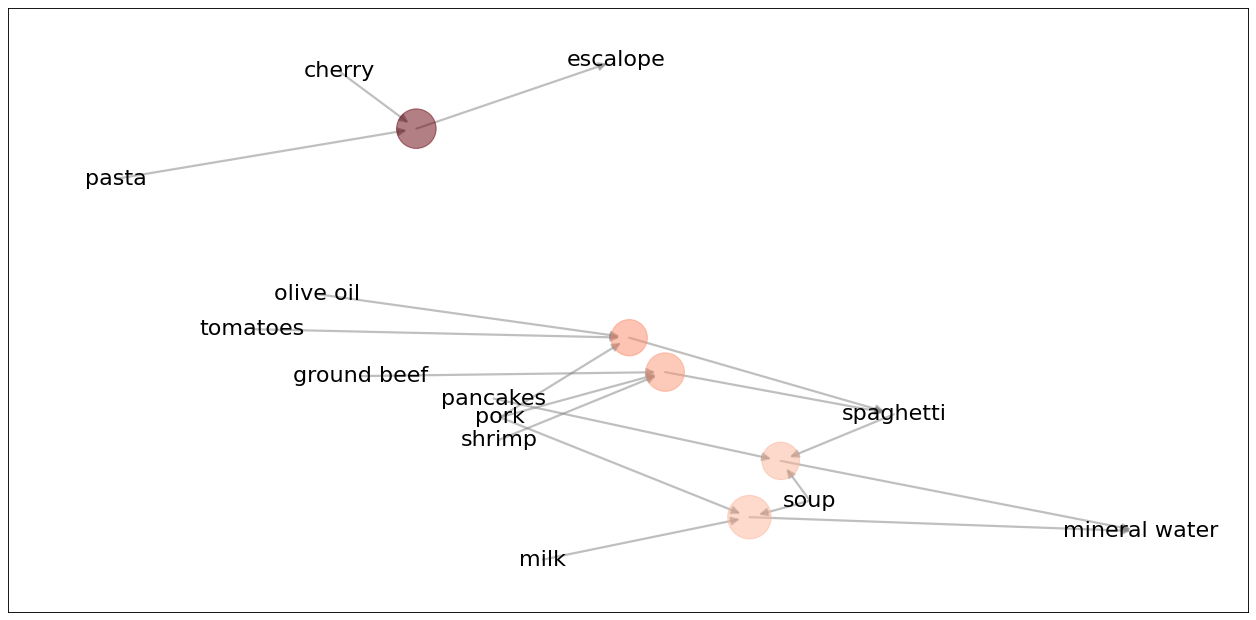

In [14]:
drawGraph(ar, Multiplier=500000)